In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [187]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [188]:
df.shape

(768, 9)

In [189]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [209]:
df1 = df.drop(columns = ['Pregnancies','Outcome'])
df = pd.read_csv('diabetes.csv', na_values = {var : 0 for var in df1.columns})

In [210]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [212]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Data Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

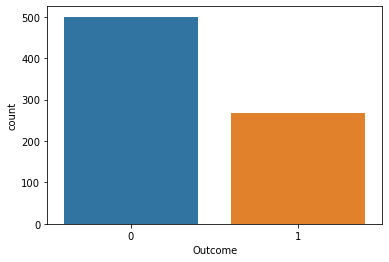

In [213]:
sns.countplot(df['Outcome'])

<AxesSubplot:>

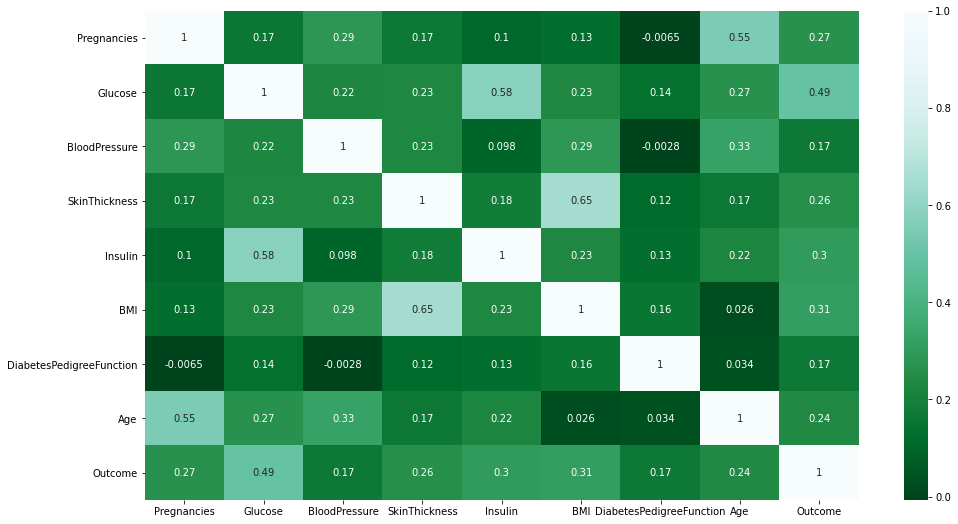

In [195]:
plt.figure(figsize = (16, 9))
sns.heatmap(df.corr(), annot = True, cmap = 'BuGn_r')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

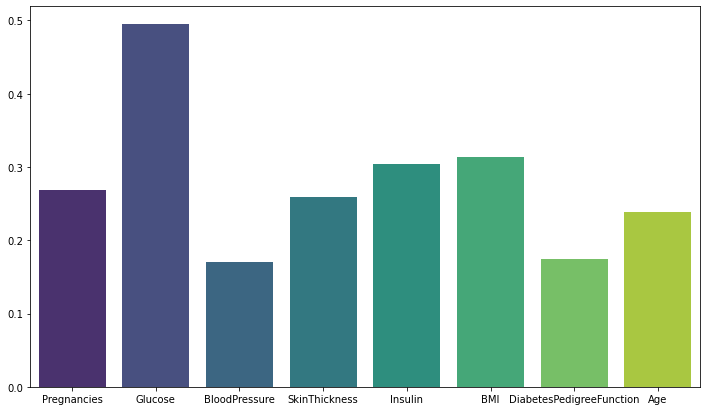

In [196]:
df1 = df.drop(columns = ['Outcome'])
plt.figure(figsize = (12, 7))
sns.barplot(df1.corrwith(df['Outcome']).index, df1.corrwith(df['Outcome']), palette = 'viridis')

<Figure size 864x504 with 0 Axes>

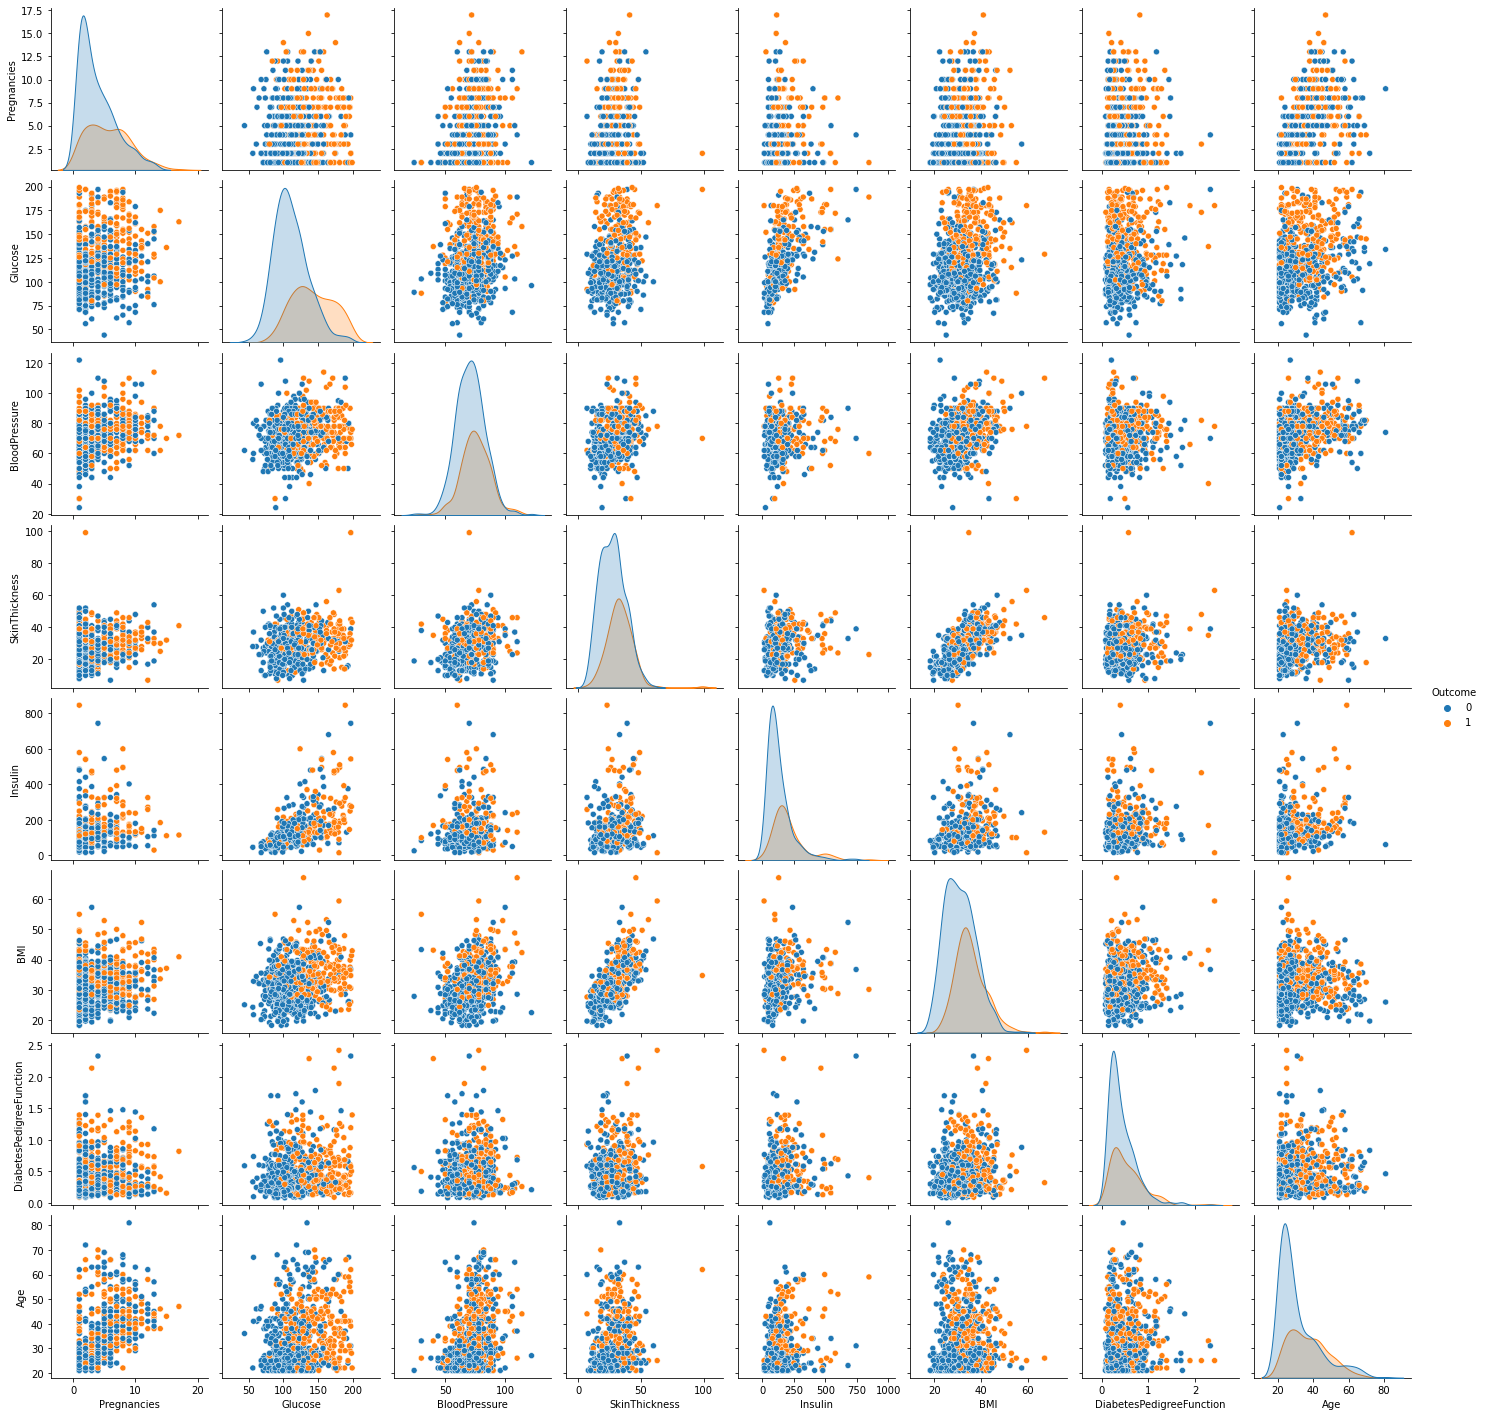

In [197]:
plt.figure(figsize = (12, 7))
sns.pairplot(df, hue = 'Outcome')

## Split Data

In [214]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)
print('Shape of X_train ->', X_train.shape)
print('Shape of X_test ->' , X_test.shape)
print('Shape of y_train ->' , y_train.shape)
print('Shape of y_test ->' , y_test.shape)

Shape of X_train -> (614, 8)
Shape of X_test -> (154, 8)
Shape of y_train -> (614,)
Shape of y_test -> (154,)


## Data Cleaning

In [216]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [217]:
imputer_mean  = SimpleImputer()
X_train = imputer_mean.fit_transform(X_train)
X_test = imputer_mean.fit_transform(X_test)

## Feature Scaling

In [218]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

## Train Data

In [219]:
## Logistic Regression

# with scaling
from sklearn.linear_model import LogisticRegression
lr_sc = LogisticRegression()
lr_sc.fit(X_train_sc, y_train)
lr_sc.score(X_test_sc, y_test)

0.7597402597402597

In [220]:
y_pred_lr_sc = lr_sc.predict(X_test_sc)
print(classification_report(y_test, y_pred_lr_sc))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [293]:
confusion_matrix(y_test, y_pred_lr_sc)

array([[84, 16],
       [21, 33]], dtype=int64)

In [231]:
## KNN Classification

# with scaling

from sklearn.neighbors import KNeighborsClassifier
knn_sc = KNeighborsClassifier(n_neighbors=7)
knn_sc.fit(X_train_sc, y_train)
knn_sc.score(X_test_sc, y_test)

0.7467532467532467

In [235]:
y_pred_knn_sc = knn_sc.predict(X_test_sc)
print(classification_report(y_test, y_pred_knn_sc))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



In [294]:
confusion_matrix(y_test, y_pred_knn_sc)

array([[82, 18],
       [21, 33]], dtype=int64)

In [305]:
## SVC

# with scaling

from sklearn.svm import SVC
svc_sc = SVC(kernel='linear')
svc_sc.fit(X_train_sc, y_train)
svc_sc.score(X_test_sc, y_test)

0.7662337662337663

In [306]:
y_pred_svc_sc = svc_sc.predict(X_test_sc)
print(classification_report(y_test, y_pred_svc_sc))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [307]:
confusion_matrix(y_test, y_pred_svc_sc)

array([[85, 15],
       [21, 33]], dtype=int64)

In [248]:
# without scaling

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7532467532467533

In [250]:
## Naive Bayes

# with scaling

from sklearn.naive_bayes import GaussianNB
gnb_sc = GaussianNB()
gnb_sc.fit(X_train_sc, y_train)
y_pred_gnb_sc = gnb_sc.predict(X_test_sc)
gnb_sc.score(X_test_sc, y_test)

0.7597402597402597

In [252]:
y_pred_gnb_sc = gnb_sc.predict(X_test_sc)
print(classification_report(y_test, y_pred_gnb_sc))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [298]:
confusion_matrix(y_test, y_pred_gnb_sc)

array([[85, 15],
       [22, 32]], dtype=int64)

In [261]:
# without scaling

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.7532467532467533

In [262]:
y_pred_gnb = gnb.predict(X_test_sc)
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79       100
           1       0.57      0.07      0.13        54

    accuracy                           0.66       154
   macro avg       0.62      0.52      0.46       154
weighted avg       0.63      0.66      0.56       154



In [299]:
confusion_matrix(y_test, y_pred_gnb)

array([[97,  3],
       [50,  4]], dtype=int64)

In [257]:
## Decision Tree Classification

# with scaling

from sklearn.tree import DecisionTreeClassifier
dt_sc = DecisionTreeClassifier(criterion='entropy')
dt_sc.fit(X_train_sc, y_train)
dt_sc.score(X_test_sc, y_test)

0.6753246753246753

In [263]:
y_pred_dt_sc = dt_sc.predict(X_test_sc)
print(classification_report(y_test, y_pred_dt_sc))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       100
           1       0.53      0.59      0.56        54

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.68      0.68      0.68       154



In [300]:
confusion_matrix(y_test, y_pred_dt_sc)

array([[72, 28],
       [22, 32]], dtype=int64)

In [260]:
# without scaling

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7207792207792207

In [264]:
y_pred_dt = dt.predict(X_test_sc)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       100
           1       1.00      0.04      0.07        54

    accuracy                           0.66       154
   macro avg       0.83      0.52      0.43       154
weighted avg       0.78      0.66      0.54       154



In [301]:
confusion_matrix(y_test, y_pred_dt)

array([[100,   0],
       [ 52,   2]], dtype=int64)

In [273]:
## Random Forest Classification

# with scaling

from sklearn.ensemble import RandomForestClassifier
rf_sc = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
rf_sc.fit(X_train_sc, y_train)
rf_sc.score(X_test_sc, y_test)

0.7532467532467533

In [286]:
y_pred_rf_sc  = rf_sc .predict(X_test_sc)
print(classification_report(y_test, y_pred_rf_sc ))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [302]:
confusion_matrix(y_test, y_pred_rf_sc)

array([[82, 18],
       [20, 34]], dtype=int64)

## Save Model

In [315]:
import joblib

joblib.dump(svc_sc, 'model_save')

['model_save']

In [316]:
model = joblib.load('model_save')